# Data Exploration

Initial exploration of scraped property data

In [1]:
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# Load data
data_files = list(Path('../data/raw').glob('*.json'))
print(f"Found {len(data_files)} data files")

if data_files:
    latest_file = max(data_files, key=lambda p: p.stat().st_mtime)
    print(f"Loading: {latest_file.name}")

Found 1 data files
Loading: fotocasa_20251119_170227.json


In [3]:
# Load and display
if data_files:
    with open(latest_file) as f:
        data = json.load(f)
    
    df = pd.DataFrame(data)
    print(f"Loaded {len(df)} properties")
    display(df.head())

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

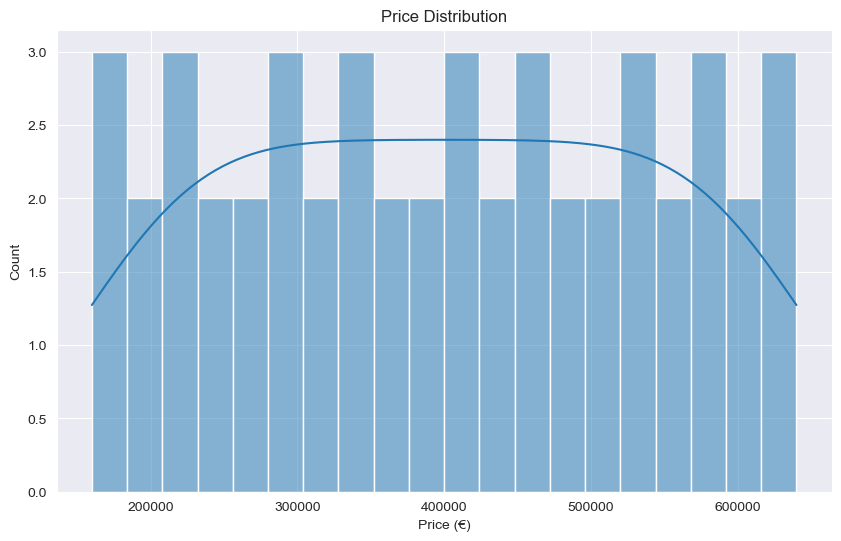

In [4]:
# Price distribution
if not df.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['price'], bins=20, kde=True)
    plt.title('Price Distribution')
    plt.xlabel('Price (€)')
    plt.show()

In [5]:
# Basic statistics
if not df.empty:
    print("\nBasic Statistics:")
    print(df[['price', 'size_m2']].describe())


Basic Statistics:
               price     size_m2
count      49.000000   49.000000
mean   400000.000000  205.000000
std    142886.901662   71.443451
min    160000.000000   85.000000
25%    280000.000000  145.000000
50%    400000.000000  205.000000
75%    520000.000000  265.000000
max    640000.000000  325.000000
